PG(t)=A1​⋅sin(2πf1​t)+A2​⋅sin(2πf2​t)+Bruit

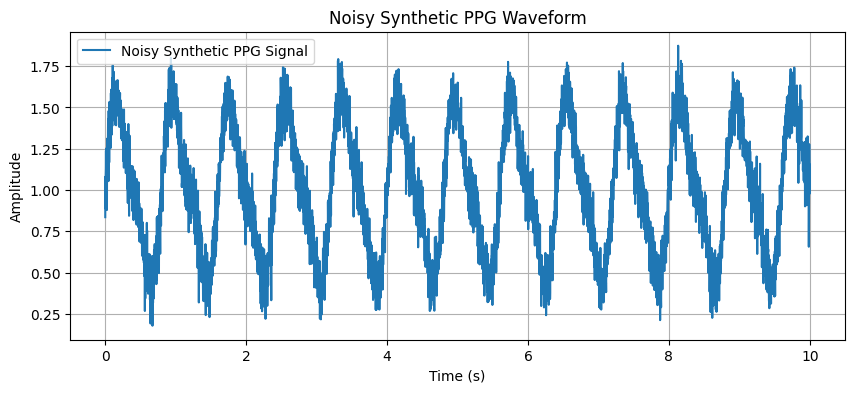

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 500  # Hz
duration = 10  # seconds
heart_rate_bpm = 75  # beats per minute
heart_rate_hz = heart_rate_bpm / 60.0  # convert to Hz
t = np.linspace(0, duration, sampling_rate * duration)  # time array

# Baseline value for PPG
PPG_BASELINE = 1

# Increase the noise level
noise_level = 0.1  

# Generating the synthetic PPG waveform with increased noise
ppg_waveform = (
    PPG_BASELINE + 
    0.5 * (np.sin(2 * np.pi * heart_rate_hz * t) + 0.3 * np.sin(2 * np.pi * 2 * heart_rate_hz * t)) +
    noise_level * np.random.normal(size=sampling_rate * duration)
)

# Plot the noisy PPG signal
plt.figure(figsize=(10, 4))
plt.plot(t, ppg_waveform, label="Noisy Synthetic PPG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Noisy Synthetic PPG Waveform")
plt.grid(True)
plt.legend()
plt.show()


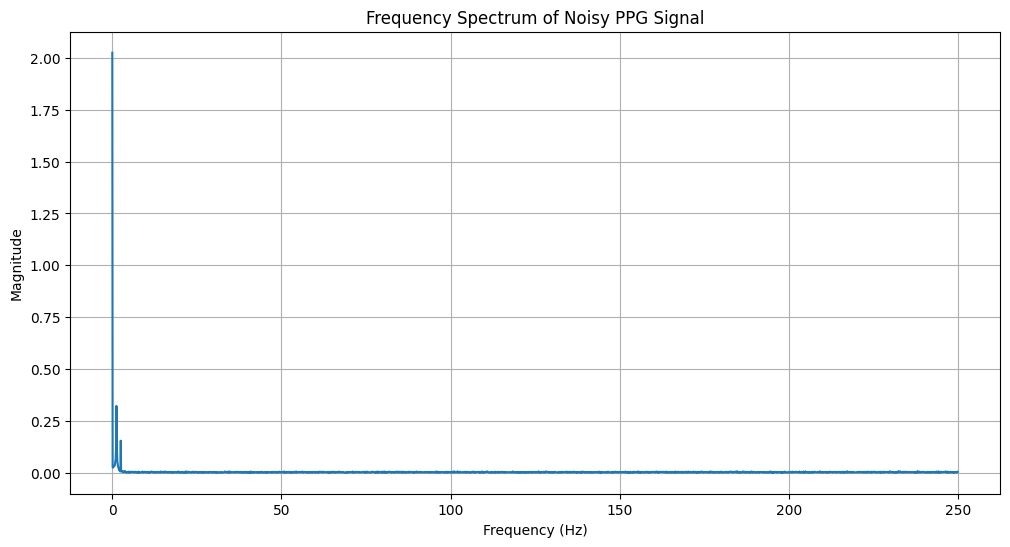

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Compute the FFT of the noisy PPG signal
N = len(ppg_waveform)  # Number of sample points
T = 1.0 / sampling_rate  # Sample spacing
frequencies = np.fft.fftfreq(N, T)[:N//2]  # Frequency values for the FFT plot
fft_values = fft(ppg_waveform)  # FFT values
fft_magnitude = 2.0 / N * np.abs(fft_values[:N//2])  # Magnitude of FFT values

# Plot the frequency spectrum
plt.figure(figsize=(12,6))
plt.plot(frequencies, fft_magnitude)
plt.title('Frequency Spectrum of Noisy PPG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


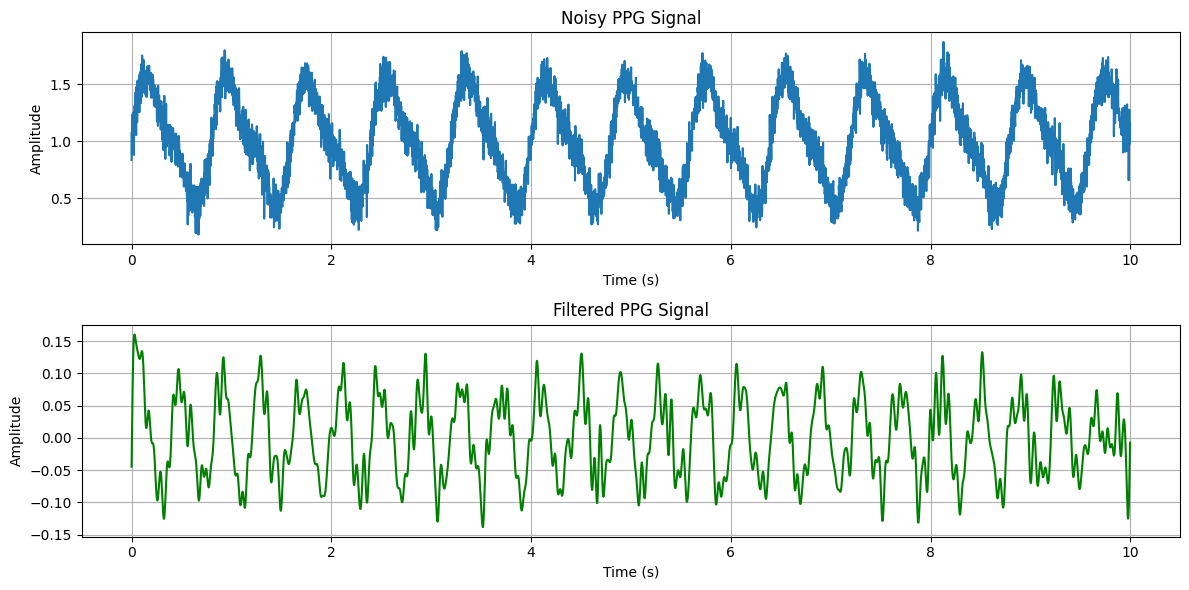

In [21]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Apply the bandpass filter
lowcut = 0.5  # low frequency cutoff in Hz (around 30 bpm)
highcut = 4.0 # high frequency cutoff in Hz (around 240 bpm)
fs = 100  # sampling frequency in Hz

# Apply the bandpass filter to the noisy PPG signal
filtered_data = bandpass_filter(ppg_waveform, lowcut, highcut, fs)

# Plot both noisy and filtered PPG signals for comparison
plt.figure(figsize=(12,6))

# Plot the noisy PPG signal
plt.subplot(2, 1, 1)
plt.plot(t, ppg_waveform, label="Noisy PPG Signal")
plt.title("Noisy PPG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the filtered PPG signal
plt.subplot(2, 1, 2)
plt.plot(t, filtered_data, label="Filtered PPG Signal", color='green')
plt.title("Filtered PPG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()



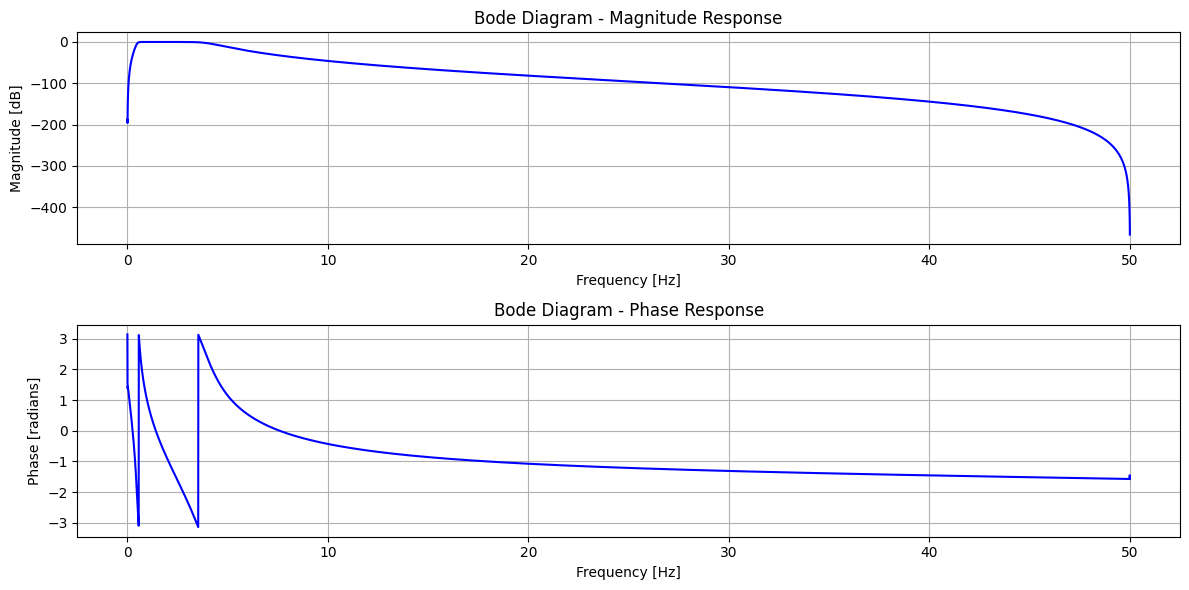

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz

# Design the Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y  # Only return the filtered signal

# Bode diagram for the filter
def plot_bode(b, a, fs):
    w, h = freqz(b, a, worN=8000)  # Compute frequency response
    plt.figure(figsize=(12, 6))

    # Magnitude response
    plt.subplot(2, 1, 1)
    plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')  # Convert to dB
    plt.title('Bode Diagram - Magnitude Response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid()

    # Phase response
    plt.subplot(2, 1, 2)
    plt.plot(0.5 * fs * w / np.pi, np.angle(h), 'b')
    plt.title('Bode Diagram - Phase Response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [radians]')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Parameters
fs = 100       # Sampling frequency in Hz
lowcut = 0.5   # Low cut-off frequency in Hz
highcut = 4.0  # High cut-off frequency in Hz
order = 5      # Filter order


# Apply bandpass filter
filtered_data = bandpass_filter(ppg_waveform, lowcut, highcut, fs, order)

# Get filter coefficients for plotting the Bode diagram
b, a = butter_bandpass(lowcut, highcut, fs, order)

# Plot the Bode diagram
plot_bode(b, a, fs)
